#  germantrafficsigns

In [70]:
#load the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from scipy.io import loadmat
import pickle
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

import os
import warnings
warnings.filterwarnings("ignore")

In [71]:
path = '../ten-datasets/germantrafficsigns/'
#load the dataset into a dataframe
df = pd.read_csv(path + 'signnames.csv')

In [72]:
num_classes = df.shape[0]
print(df.shape)
df.head()

(43, 2)


,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


In [73]:
#load the dataset into a dataframe

training_file = path+"train.p"
testing_file = path+"test.p"
validation_file= path+"valid.p"

with open(training_file, mode='rb') as f:
    train_data = pickle.load(f)
    
with open(testing_file, mode='rb') as f:
    test_data = pickle.load(f)
    
with open(validation_file, mode='rb') as f:
    valid_data = pickle.load(f)

In [74]:
X_train, y_train = train_data['features'],train_data['labels']
X_test, y_test = test_data['features'],test_data['labels']
X_valid, y_valid = valid_data['features'],valid_data['labels']

In [75]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(34799, 32, 32, 3)
(34799,)
(4410, 32, 32, 3)
(4410,)


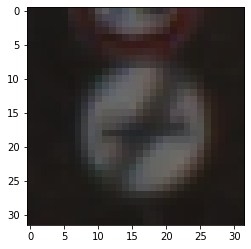

In [76]:
plt.imshow(X_train[0])

In [77]:
print("Number of classes: {}".format(num_classes))
print("Image Shape: {}".format(X_train[0].shape))
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_valid)))
print("Test Set:       {} samples".format(len(X_test)))

Number of classes: 43
Image Shape: (32, 32, 3)
Training Set:   34799 samples
Validation Set: 4410 samples
Test Set:       12630 samples


# Preprocess Data
## Shuffle the training data.


(34799, 32, 32, 3)

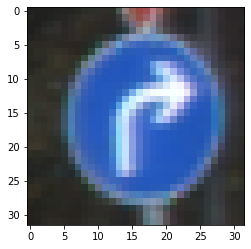

In [78]:
X_train, y_train = shuffle(X_train, y_train)
plt.imshow(X_train[0])
X_train.shape

# shallow learning

> ### RandomForest

> ### Softmax Regression

### data processing

In [79]:
import cv2

In [80]:
def equi_hist(image):
    image[:,:,0] = cv2.equalizeHist(image[:,:,0])
    image[:,:,1] = cv2.equalizeHist(image[:,:,1])
    image[:,:,2] = cv2.equalizeHist(image[:,:,2])
    return image

In [81]:
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

def equalize(img):
    img = cv2.equalizeHist(img)
    return img

def preprocess(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255
    return img

In [82]:
X_train_adv = np.array(list(map(preprocess, X_train)))
X_test_adv = np.array(list(map(preprocess, X_test)))
X_valid_adv = np.array(list(map(preprocess, X_valid)))


(34799, 32, 32)

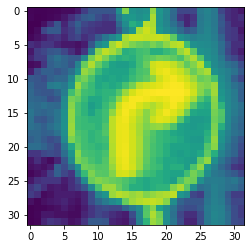

In [83]:
plt.imshow(X_train_adv[0])
X_train_adv.shape # one channel gray image

In [84]:
def to_2_dim(X_org):
    print("before: ",X_org.shape)
    X_size = len(X_org)
    TwoDim_X = X_org.reshape(X_size,-1)
    print("after:",TwoDim_X.shape)
    return TwoDim_X


In [85]:
TwoDim_X_train_adv= to_2_dim(X_train_adv) # to 2 dim
TwoDim_X_test_adv = to_2_dim(X_test_adv)
TwoDim_X_valid_adv = to_2_dim(X_valid_adv)

before:  (34799, 32, 32)
after: (34799, 1024)
before:  (12630, 32, 32)
after: (12630, 1024)
before:  (4410, 32, 32)
after: (4410, 1024)


## Random Forest


In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
%%time
forest = RandomForestClassifier(criterion='gini', max_leaf_nodes=50,
                                n_estimators = 800, random_state =1,
                                n_jobs =-1,verbose=True, oob_score=True)
forest.fit(TwoDim_X_train_adv,y_train)
forest.oob_score_

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   23.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   53.4s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:  1.6min finished


CPU times: user 9min 36s, sys: 9.02 s, total: 9min 45s
Wall time: 1min 57s


0.6672318170062358

In [88]:
%%time
y_train_predict = forest.predict_proba(TwoDim_X_train_adv).argmax(axis = 1)
print ("forest Train Accuracy: %.3f" % accuracy_score(y_train,y_train_predict))
# y_train_predict

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    1.5s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    3.5s


forest Train Accuracy: 0.680
CPU times: user 24.1 s, sys: 2.02 s, total: 26.1 s
Wall time: 6.87 s


[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    6.4s
[Parallel(n_jobs=8)]: Done 800 out of 800 | elapsed:    6.5s finished


In [89]:
y_valid_predict = forest.predict_proba(TwoDim_X_valid_adv).argmax(axis = 1)
print("softmax_reg Test Accuracy: %.3f" % accuracy_score(y_valid,y_valid_predict))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.5s


softmax_reg Test Accuracy: 0.635


[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Done 800 out of 800 | elapsed:    0.9s finished


In [90]:
%%time
y_test_predict = forest.predict_proba(TwoDim_X_test_adv).argmax(axis = 1)
print("forest Test Accuracy: %.3f" % accuracy_score(y_test,y_test_predict))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    1.4s


forest Test Accuracy: 0.624
CPU times: user 8.96 s, sys: 946 ms, total: 9.9 s
Wall time: 2.65 s


[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    2.4s
[Parallel(n_jobs=8)]: Done 800 out of 800 | elapsed:    2.5s finished


## Softmax Regression

In [91]:
from sklearn.linear_model import LogisticRegression

In [92]:
%%time
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(TwoDim_X_train_adv, y_train)

CPU times: user 1min 36s, sys: 2.94 s, total: 1min 39s
Wall time: 26.2 s


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [93]:
%%time
y_train_predict = softmax_reg.predict_proba(TwoDim_X_train_adv).argmax(axis = 1)
print ("softmax_reg Train Accuracy: %.3f" % accuracy_score(y_train,y_train_predict))

softmax_reg Train Accuracy: 0.912
CPU times: user 599 ms, sys: 27 ms, total: 626 ms
Wall time: 175 ms


In [94]:
y_valid_predict = softmax_reg.predict_proba(TwoDim_X_valid_adv).argmax(axis = 1)
print("softmax_reg Test Accuracy: %.3f" % accuracy_score(y_valid,y_valid_predict))

softmax_reg Test Accuracy: 0.802


In [95]:
y_test_predict = softmax_reg.predict_proba(TwoDim_X_test_adv).argmax(axis = 1)
print("softmax_reg Test Accuracy: %.3f" % accuracy_score(y_test,y_test_predict))

softmax_reg Test Accuracy: 0.796


# deep learning
> #### CNN
> #### MLP
> #### RNN

In [96]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D
from keras import backend as K
from keras.layers.recurrent import SimpleRNN
from keras.utils.vis_utils import plot_model

In [98]:
print(X_train.shape)
print(y_train.shape)
y_train[0]

(34799, 32, 32, 3)
(34799,)


33

# Normalization


In [99]:

batch_size = 128
num_classes = 43 # 10
# epochs = 12

# input image dimensions
img_rows, img_cols = 32, 32 

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 3)
X_valid = X_valid.reshape(X_valid.shape[0], img_rows, img_cols, 3)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 3)
input_shape = (img_rows, img_cols, 3)


X_train = X_train.astype('float32')
X_valid = X_valid.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_valid /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_valid.shape[0], 'valid samples')
print(X_test.shape[0], 'test samples')

y_train = y_train.reshape(y_train.shape[0])
y_valid = y_valid.reshape(y_valid.shape[0])
y_test = y_test.reshape(y_test.shape[0])
print(y_train.shape)
print(y_test.shape)

# convert class vectors to binary class matrices  
y_train = keras.utils.to_categorical(y_train, num_classes) #one hot encoding
y_test = keras.utils.to_categorical(y_test, num_classes)
y_train.shape

X_train shape: (34799, 32, 32, 3)
34799 train samples
4410 valid samples
12630 test samples
(34799,)
(12630,)


(34799, 43)

## CNN

In [116]:

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding='same',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()


# image_name = 'trafficSigns_cnn_model.png'
# plot_model(model,to_file=image_name,show_shapes=True,show_layer_names=False,rankdir='TB')
# plt.figure(figsize=(20,20))
# img = plt.imread(image_name)
# plt.imshow(img)
# plt.axis('off')
# plt.show()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 64)        

In [115]:
%%time

hist = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                 validation_data=(X_test, y_test)
                )
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 34799 samples, validate on 12630 samples
Epoch 1/10
34799/34799 [==============================] - 188s 5ms/step - loss: 1.5859 - accuracy: 0.5449 - val_loss: 0.4432 - val_accuracy: 0.8734
Epoch 2/10
34799/34799 [==============================] - 180s 5ms/step - loss: 0.2307 - accuracy: 0.9287 - val_loss: 0.2141 - val_accuracy: 0.9439
Epoch 3/10
34799/34799 [==============================] - 183s 5ms/step - loss: 0.1041 - accuracy: 0.9681 - val_loss: 0.1954 - val_accuracy: 0.9495
Epoch 4/10
34799/34799 [==============================] - 187s 5ms/step - loss: 0.0683 - accuracy: 0.9799 - val_loss: 0.1995 - val_accuracy: 0.9571
Epoch 5/10
34799/34799 [==============================] - 189s 5ms/step - loss: 0.0472 - accuracy: 0.9853 - val_loss: 0.2142 - val_accuracy: 0.9504
Epoch 6/10
34799/34799 [==============================] - 187s 5ms/step - loss: 0.0425 - accuracy: 0.9867 - val_loss: 0.1690 - val_accuracy: 0.9614
Epoch 7/10
34799/34799 [==============================] - 188s

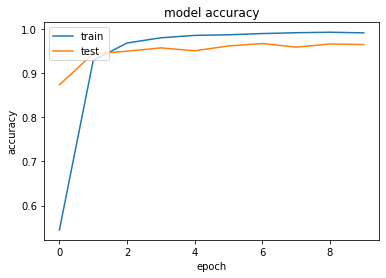

In [117]:
plt.figure()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')

plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

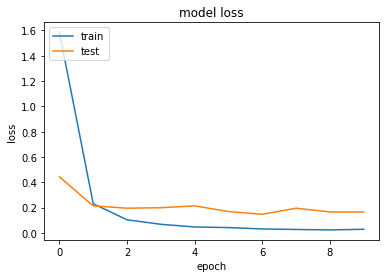

In [118]:
plt.figure()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')

plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [119]:
score = model.evaluate(X_test, y_test, verbose=0)


In [120]:
predictions = model.predict(X_test) #X_test, y_test

In [37]:
predictions[2]

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 2.0860727e-37,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       1.1353616e-34, 5.1077794e-36, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 1.6948686e-26, 0.0000000e+00, 4.6581787e-36,
       0.0000000e+00, 0.0000000e+00, 1.8374903e-33, 0.0000000e+00,
       4.7026192e-28, 0.0000000e+00, 5.2630416e-38, 5.0575733e-32,
       1.9892777e-36, 4.4495519e-34, 2.2460859e-37, 0.0000000e+00,
       1.5574195e-32, 1.1191283e-35, 0.0000000e+00, 3.9180117e-32,
       4.2137937e-35, 1.3099856e-29, 1.7682166e-18, 3.2132998e-28,
       1.9553474e-20, 1.1936492e-34, 1.0000000e+00, 5.2525209e-27,
       1.2581418e-25, 7.0220730e-30, 0.0000000e+00], dtype=float32)

In [38]:
y_test[2]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# MLP

In [121]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.layers import Flatten,Conv1D,GlobalMaxPooling1D,MaxPooling1D,GlobalAveragePooling1D,Input,MaxPool1D,BatchNormalization


In [122]:
model = Sequential()
# model.add(Flatten(input_shape=X_train.shape + (3,)))
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(512, activation='tanh'))
model.add(Dropout(0.25))

model.add(Dense(256, activation='tanh'))
model.add(Dropout(0.25))


model.add(Dense(43, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()


# image_name = 'trafficSigns_ann_model.png'
# plot_model(model,to_file=image_name,show_shapes=True,show_layer_names=False,rankdir='TB')
# plt.figure(figsize=(20,20))
# img = plt.imread(image_name)
# plt.imshow(img)
# plt.axis('off')
# plt.show()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dropout_22 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_23 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 43)                11051     
Total params: 1,715,755
Trainable params: 1,715,755
Non-trainable params: 0
___________________________________________

In [123]:
hist = model.fit(X_train, y_train,batch_size=128,epochs=10,verbose=1,shuffle=True,
                 validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 34799 samples, validate on 12630 samples
Epoch 1/10
34799/34799 [==============================] - 10s 299us/step - loss: 2.0882 - accuracy: 0.4214 - val_loss: 1.1791 - val_accuracy: 0.6565
Epoch 2/10
34799/34799 [==============================] - 10s 284us/step - loss: 0.8584 - accuracy: 0.7448 - val_loss: 0.8320 - val_accuracy: 0.7690
Epoch 3/10
34799/34799 [==============================] - 10s 284us/step - loss: 0.6001 - accuracy: 0.8203 - val_loss: 0.7115 - val_accuracy: 0.8005
Epoch 4/10
34799/34799 [==============================] - 11s 308us/step - loss: 0.4894 - accuracy: 0.8544 - val_loss: 0.6763 - val_accuracy: 0.8115
Epoch 5/10
34799/34799 [==============================] - 10s 295us/step - loss: 0.4325 - accuracy: 0.8722 - val_loss: 0.5913 - val_accuracy: 0.8413
Epoch 6/10
34799/34799 [==============================] - 10s 281us/step - loss: 0.4187 - accuracy: 0.8736 - val_loss: 0.7220 - val_accuracy: 0.8107
Epoch 7/10
34799/34799 [==============================] 

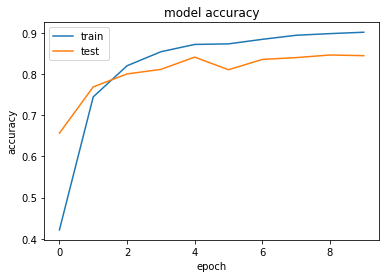

In [124]:
plt.figure()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')

plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

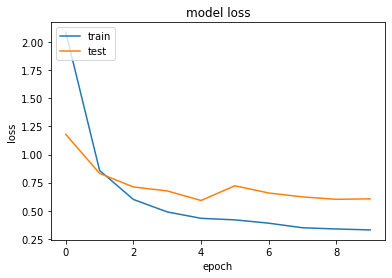

In [125]:
plt.figure()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')

plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [126]:
predictions = model.predict(X_test) #X_test, y_test

In [127]:
predictions[2]

array([2.0256215e-14, 1.1562665e-14, 1.2935044e-12, 1.6518713e-10,
       3.2650437e-13, 3.5132268e-12, 7.5479019e-11, 1.1986810e-15,
       4.8147688e-12, 2.0091225e-10, 2.3134585e-12, 2.6273848e-11,
       1.0982647e-08, 4.1289612e-09, 8.0123332e-13, 4.2839904e-10,
       7.6868606e-13, 1.1552662e-13, 7.8231658e-08, 2.4648511e-10,
       5.7246862e-06, 1.5653942e-12, 2.1641020e-08, 6.9606925e-09,
       1.5002112e-08, 3.2396741e-08, 2.7409252e-08, 3.6004308e-09,
       5.8556240e-09, 2.1942419e-10, 2.0716419e-10, 3.5804323e-10,
       1.5046011e-08, 9.1537550e-10, 1.4602133e-06, 2.4981043e-07,
       1.8146178e-05, 4.4395660e-09, 9.9997401e-01, 2.9390274e-10,
       5.7457545e-08, 1.1906037e-07, 8.4639734e-12], dtype=float32)

In [128]:
y_test[2]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## RNN

In [129]:
from keras.layers.recurrent import SimpleRNN

In [130]:
print(X_train_adv.shape)
print(X_test_adv.shape)

(34799, 32, 32)
(12630, 32, 32)


In [131]:
model = Sequential()
model.add(SimpleRNN(units = 50, input_shape=(32,32) ))
# model.add(Dropout(0.2))
# model.add(SimpleRNN(units = 50 ))
# model.add(Dropout(0.2))
# model.add(SimpleRNN(50,return_sequences=True))

model.add(Dense(43,activation = "softmax"))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

# image_name = 'trafficSigns_rnn_model.png'
# plot_model(model,to_file=image_name,show_shapes=True,show_layer_names=False,rankdir='TB')
# plt.figure(figsize=(10,10))
# img = plt.imread(image_name)
# plt.imshow(img)
# plt.axis('off')
# plt.show()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 50)                4150      
_________________________________________________________________
dense_24 (Dense)             (None, 43)                2193      
Total params: 6,343
Trainable params: 6,343
Non-trainable params: 0
_________________________________________________________________


In [132]:
hist = model.fit(X_train_adv, y_train,batch_size=128,epochs=20,verbose=1,shuffle=True,
                 validation_data=(X_test_adv, y_test))
score = model.evaluate(X_test_adv, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 34799 samples, validate on 12630 samples
Epoch 1/20
34799/34799 [==============================] - 5s 136us/step - loss: 3.1922 - accuracy: 0.1303 - val_loss: 2.7240 - val_accuracy: 0.2276
Epoch 2/20
34799/34799 [==============================] - 3s 95us/step - loss: 2.3743 - accuracy: 0.3161 - val_loss: 2.3160 - val_accuracy: 0.3434
Epoch 3/20
34799/34799 [==============================] - 4s 102us/step - loss: 1.9661 - accuracy: 0.4200 - val_loss: 1.9163 - val_accuracy: 0.4374
Epoch 4/20
34799/34799 [==============================] - 3s 98us/step - loss: 1.6346 - accuracy: 0.5091 - val_loss: 1.6636 - val_accuracy: 0.5009
Epoch 5/20
34799/34799 [==============================] - 3s 95us/step - loss: 1.3997 - accuracy: 0.5807 - val_loss: 1.4804 - val_accuracy: 0.5683
Epoch 6/20
34799/34799 [==============================] - 3s 93us/step - loss: 1.2408 - accuracy: 0.6309 - val_loss: 1.4023 - val_accuracy: 0.5900
Epoch 7/20
34799/34799 [==============================] - 3s 100us

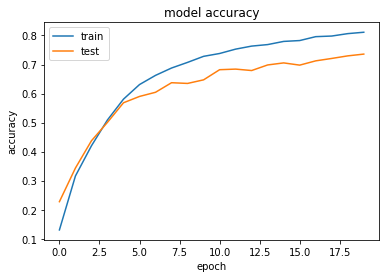

In [133]:
plt.figure()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')

plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

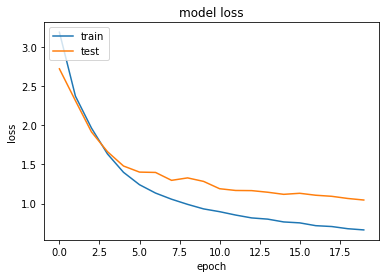

In [134]:
plt.figure()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')

plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()